## Bike Sharing Assignment

## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### The Solution is divided into the following sections:

-  Data Understanding and exploration
-  Data Visualisation
-  Data Preparation
-  Model building and evaluation

### Step 1: Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Step 2: Reading Dataset and Understanding Data

In [3]:
# Importing dataset and checking the data
bike = pd.read_csv('C:/Users/hp/Downloads/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Let's look at the number of rows and columns in the dataset
bike.shape

(730, 16)

In [5]:
# Summary of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


So, there are 730 Rows and 16 Columns with no null values.
Except one column, all other are either float or integer type.

In [6]:
# Understanding the feature name in dataset
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Getting insight of the features
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 3: Data Cleaning

#### 3.1 Drop columns that are not useful for analysis
1. 'Instant' is just a row instance identifier.
2. 'Dteday' is removed as we have some of date features like mnth and year and weekday already in other columns.
3. 'Casual' and 'Registered' variables are not available at the time of prediction and also our objective is to find the total        count of bikes and not by specific category, we will ignore these two columns.

In [8]:
# Droping instant column
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns
bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [9]:
# Checking data frame after dropping
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Checking correlation
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


From above we can see that features like season, mnth, weekday and weathersit are integers but they should be non-numerical categories.

#### 3.2 Handle Outliers

In [11]:
#Print number of unique values in all columns
bike.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

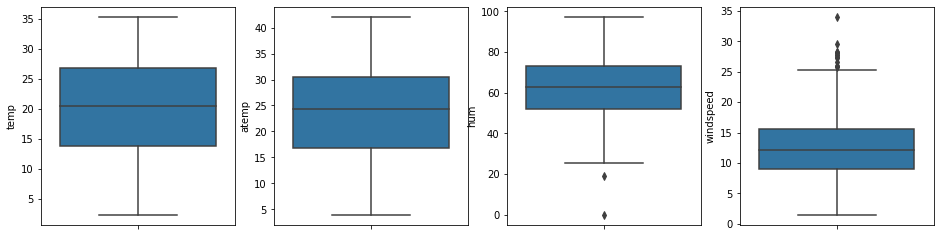

In [12]:
# Draw box plots for independent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(16,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike)
    i+=1

From these plots, we can see that there are no outliers in the dataset to be handled.

### Step 4: EDA

#### 4.1 Convert season, mnth, weekday and weathersit to categorical types

In [13]:
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### 4.2 Plotting pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

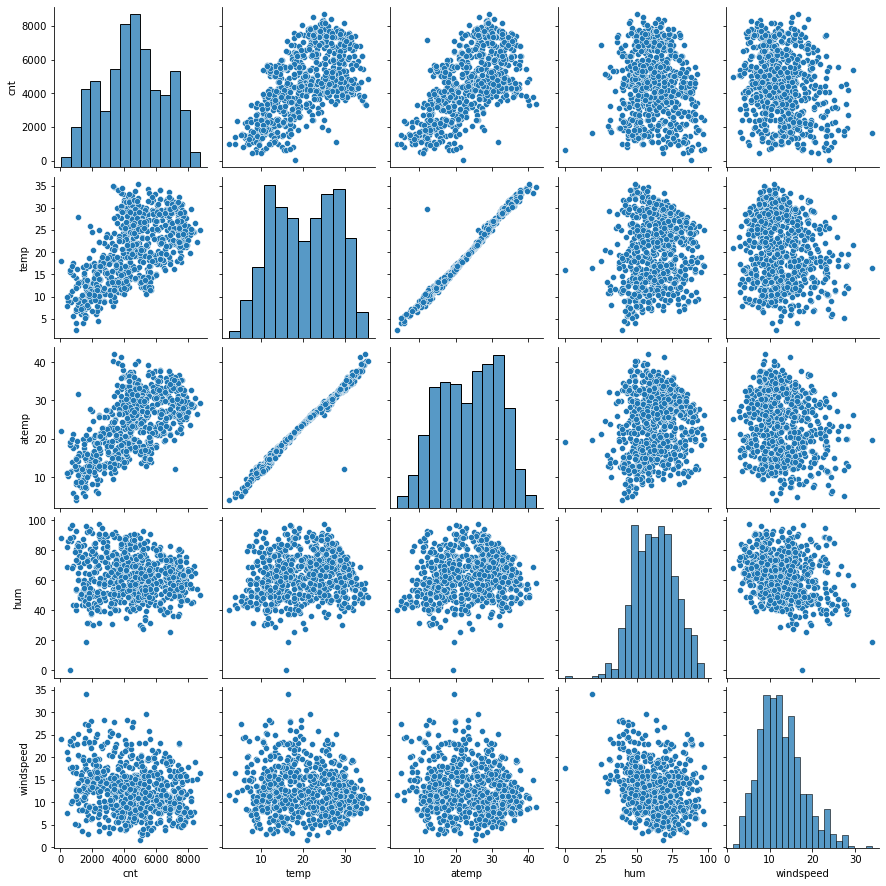

In [14]:
# Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Observations:
1. It looks like the temp and atemp has the highest corelation with the target variable cnt
2. temp and atemp are highly co-related with each other.
3. Output variable has a linear relationship with variables like temp, atemp.

#### 4.3 Correlation Matrix

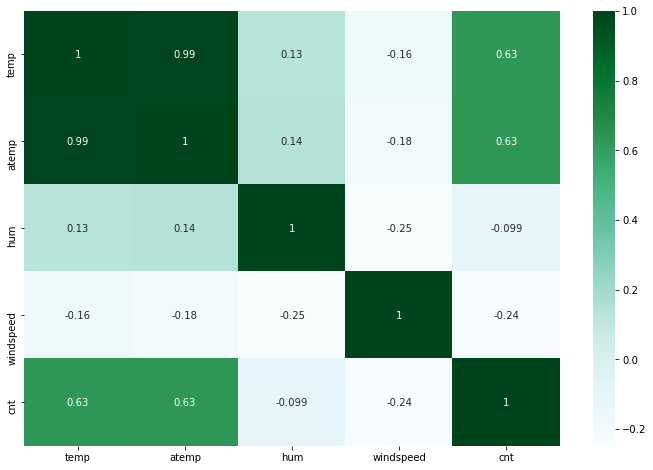

In [15]:
# Checking continuous variables relationship with each other
plt.figure(figsize=(12,8))
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

###### From the above graph, we can see that 'temp' and 'atemp' has correlation more than .99 means almost 1 (highly correlated). So, we can drop 'atemp' (dealing with multicollinearity), but keeping it for now for further analysis.

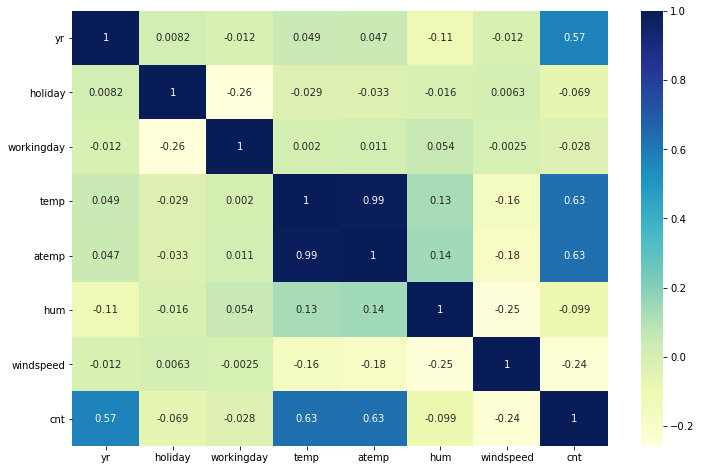

In [16]:
# Correlation for numeric variables
plt.figure(figsize=(12,8))
cor=bike.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

#### 4.4 Analysing Categorical Variabels with target variables

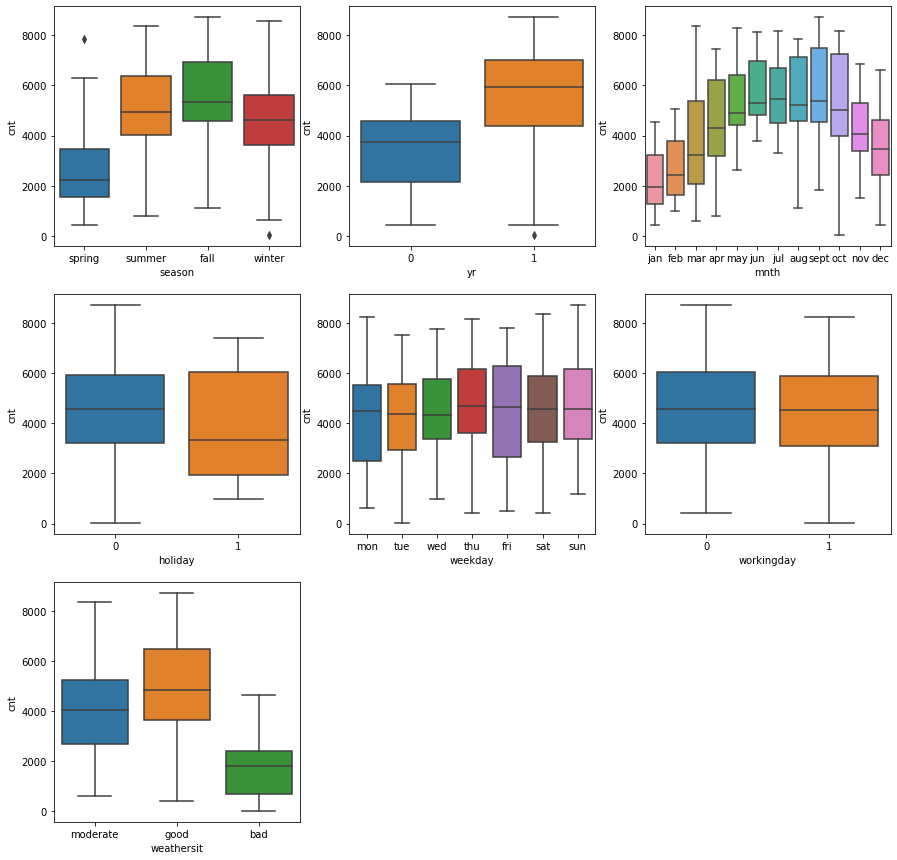

In [17]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()


From the graph, we can see that:

1. Season: 3:fall has highest demand for rental bikes.
2. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing.
3. When there is a holiday, demand has decreased.
4. The good weathersit has highest demand.
5. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

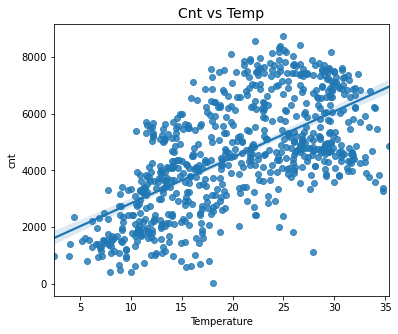

In [18]:
plt.figure(figsize=(6,5))
plt.title("Cnt vs Temp",fontsize=14)
sns.regplot(data=bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

From the graph, we can see that:
1. Demand for bikes is positively correlated to temp.
2. We can see that cnt is linearly increasing with temp indicating linear relation.

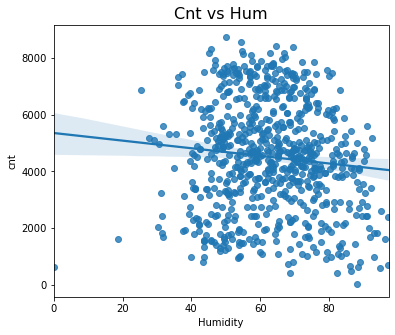

In [19]:
plt.figure(figsize=(6,5))
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

From the graph, we can see that:

1. Hum values are more scattered between 40-80.
2. We can see cnt decreasing with increase in humidity.

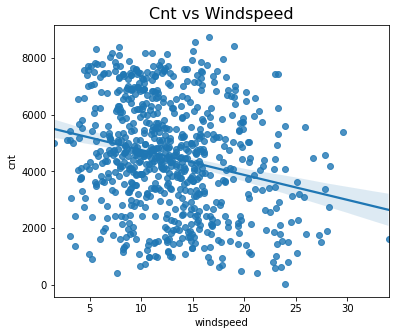

In [20]:
plt.figure(figsize=(6,5))
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike,y="cnt",x="windspeed")
plt.show()

From the graph, we can see that:

1. Windspeed values are more scattered around 10-15.
2. We can see cnt decreasing with increase in windspeed.

In [21]:
# Checking statistical summary of the dataset again
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Step 5: Data Preparation for Linear Regression

#### 5.1 Create dummy variables for all categorical variables

1. Create Dummy variable
2. Drop original variable for which the dummy was created
3. Drop first dummy variable for each set of dummies created

In [22]:
bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [23]:
# Print columns after creating dummies
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [24]:
bike.shape

(730, 30)

In [25]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


### Step 6: Model Building

#### 6.1 Split Data into training and test dataset

In [26]:
# y contains only target variable
y=bike.pop('cnt')

# X is for all remaining variables i.e. predictive variables
X= bike

# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [27]:
# Checking independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(510, 29)
(220, 29)


#### 6.2 Feature Scaling continuous variables

In [29]:
# Importing required library
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the continuous variables
num_vars = ['temp', 'hum', 'windspeed', 'atemp']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [32]:
# Checking statistical summary after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


#### 6.3 Build a Model using RFE and Automated approach

##### Use RFE to eliminate some columns

In [34]:
# Building a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
# Variable selection using RFE
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [36]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

#### 6.4 Manual elimination of columns based on RFE ranking

In [37]:
# Print Columns selected by RFE.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [38]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
X_train_rfe.shape

(510, 15)

### Step 7: Building Linear Model using 'STATS MODEL'

#### 7.1 Model 1

##### VIF Check

In [41]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [42]:
# Calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,hum,26.33
2,temp,25.12
13,weathersit_good,15.65
14,weathersit_moderate,9.30
5,season_spring,5.75
4,windspeed,4.67
7,season_winter,4.53
6,season_summer,3.30
0,yr,2.10
11,mnth_nov,1.91


##### 'hum' shows high VIF

In [43]:
# Add a constant
X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

In [44]:
# Check the parameters obtained
lr.params

const                   658.134672
yr                     2002.671228
holiday                -791.745136
temp                   4185.224862
hum                   -1409.952374
windspeed             -1640.406262
season_spring          -532.426795
season_summer           367.992581
season_winter           885.894127
mnth_dec               -308.224236
mnth_jan               -377.327863
mnth_jul               -480.233608
mnth_nov               -336.390878
mnth_sept               655.962305
weathersit_good        2142.413416
weathersit_moderate    1670.436224
dtype: float64

In [45]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          8.15e-189
Time:                        19:50:39   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 658.1347    

#### 7.2 Model 2

In [46]:
# Dropping the variable 'hum' as it has negative coefficient and is insignificant
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

VIF Check

In [47]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
12,weathersit_good,15.65
2,temp,14.02
13,weathersit_moderate,8.82
3,windspeed,4.66
4,season_spring,4.41
6,season_winter,3.36
5,season_summer,2.78
0,yr,2.08
10,mnth_nov,1.89
8,mnth_jan,1.74


In [48]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [49]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          4.75e-186
Time:                        19:50:43   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     495   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -384.0913    

#### 7.3 Model 3

In [50]:
# Dropping the variable 'mnth_nov' as it has negative coefficient and Very High p value.
X_train_new = X_train_new.drop(["mnth_nov"], axis = 1)

VIF Check

In [51]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
11,weathersit_good,14.97
2,temp,13.41
12,weathersit_moderate,8.50
3,windspeed,4.63
4,season_spring,4.35
6,season_winter,2.76
5,season_summer,2.74
0,yr,2.08
8,mnth_jan,1.72
9,mnth_jul,1.60


In [52]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [53]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          2.74e-186
Time:                        19:50:49   Log-Likelihood:                -4123.1
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -495.6691    

#### 7.4 Model 4

In [54]:
# Dropping the variable 'mnth_dec' as it has negative coefficient and Very High p value.
X_train_new = X_train_new.drop(["mnth_dec"], axis = 1)

VIF Check

In [55]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
10,weathersit_good,14.45
2,temp,13.01
11,weathersit_moderate,8.21
3,windspeed,4.62
4,season_spring,4.33
5,season_summer,2.74
6,season_winter,2.65
0,yr,2.08
7,mnth_jan,1.66
8,mnth_jul,1.59


In [56]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [57]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          8.14e-187
Time:                        19:50:54   Log-Likelihood:                -4124.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -586.7309    

#### 7.5 Model 5

In [58]:
# Dropping the variable 'mnth_jan' as it has Very High p value.
X_train_new = X_train_new.drop(["mnth_jan"], axis = 1)

VIF Check

In [59]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
9,weathersit_good,14.02
2,temp,12.55
10,weathersit_moderate,7.91
3,windspeed,4.59
4,season_spring,3.98
5,season_summer,2.74
6,season_winter,2.64
0,yr,2.07
7,mnth_jul,1.59
8,mnth_sept,1.35


In [60]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [61]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          5.06e-187
Time:                        19:50:59   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -714.7821    

#### 7.6 Model 6

In [62]:
# Dropping the variable 'mnth_jul' as it has High p value.
X_train_new = X_train_new.drop(["mnth_jul"], axis = 1)

VIF Check

In [63]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
8,weathersit_good,13.98
2,temp,11.62
9,weathersit_moderate,7.90
3,windspeed,4.59
4,season_spring,3.85
6,season_winter,2.44
5,season_summer,2.37
0,yr,2.07
7,mnth_sept,1.23
1,holiday,1.04


In [64]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [65]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.47e-186
Time:                        19:51:03   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -796.5848    

#### 7.7 Model 7

In [66]:
# Dropping the variable 'weathersit_good' as it has Very High VIF value.
X_train_new = X_train_new.drop(["weathersit_good"], axis = 1)

VIF Check

In [67]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.53
2,temp,3.84
0,yr,2.06
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.60
8,weathersit_moderate,1.52
7,mnth_sept,1.23
1,holiday,1.04


In [68]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [69]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.43e-162
Time:                        19:51:07   Log-Likelihood:                -4190.4
No. Observations:                 510   AIC:                             8401.
Df Residuals:                     500   BIC:                             8443.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1569.9968    

#### 7.8 Model 8

In [70]:
# Dropping the variable 'season_spring' as it has High p value.
X_train_new = X_train_new.drop(["season_spring"], axis = 1)

VIF Check

In [71]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
4,season_summer,1.57
7,weathersit_moderate,1.46
5,season_winter,1.35
6,mnth_sept,1.20
1,holiday,1.03


In [72]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [73]:
# Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.5
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          7.07e-163
Time:                        19:51:11   Log-Likelihood:                -4192.5
No. Observations:                 510   AIC:                             8403.
Df Residuals:                     501   BIC:                             8441.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1085.4106    

#### Insights:
1. VIF is less than 5 which seems to be accepted.
2. p-value for all the features is almost 0.0 and R2 is 0.787.
3. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no      additional parameters that can be removed from this model.
-- So we can select Model 8 as our final model for now as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 

### Step 8: Model Evaluation

#### 8.1 Residual Analysis

<AxesSubplot:ylabel='Density'>

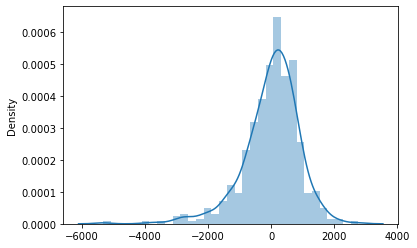

In [74]:
y_train_pred = lr7.predict(X_train_lm7)
res= y_train - y_train_pred
sns.distplot(res)

##### From the graph, we can say that errors are normally distribured here with mean 0. So model seems to be good.

In [75]:
# Print R-squared Value
r2_score(y_train,y_train_pred)

0.7870537940791509

##### R2 value is same as we obtained in our final model.

#### 8.3 Multi Colinearity

In [76]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
4,season_summer,1.57
7,weathersit_moderate,1.46
5,season_winter,1.35
6,mnth_sept,1.20
1,holiday,1.03


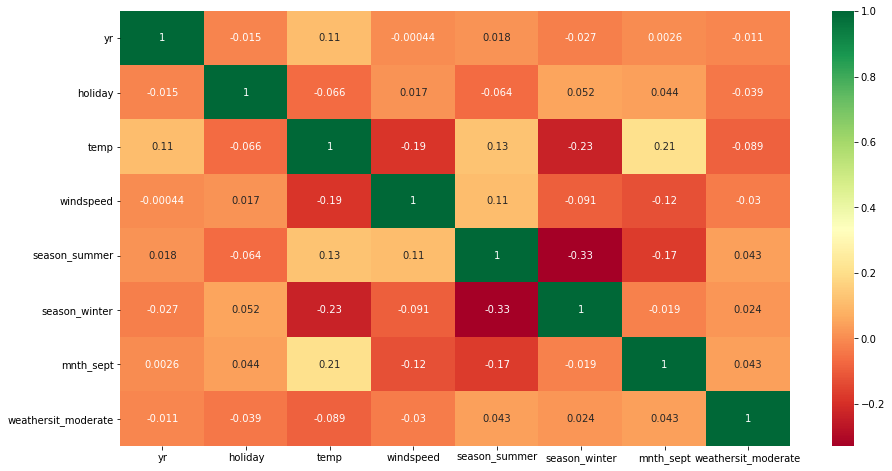

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

##### VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

#### 8.3 Homoscedasticity

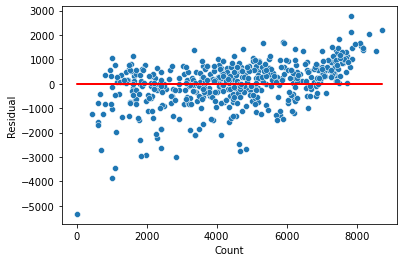

In [78]:
y_train_pred = lr7.predict(X_train_lm7)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### 8.4 Predict values for test dataset

In [79]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.342851,1.955914,0.039527,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.371477,1.808848,0.096398,0,1,0,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.235489,2.517430,0.244062,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.352932,1.270063,0.248450,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.331786,0.887696,0.410323,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [80]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)
X_test_lm7

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_sept,weathersit_moderate
184,1.0,0,1,0.831783,0.039527,0,0,0,1
535,1.0,1,0,0.901354,0.096398,1,0,0,0
299,1.0,0,0,0.511964,0.244062,0,1,0,1
221,1.0,0,0,0.881625,0.248450,0,0,0,0
152,1.0,0,0,0.817246,0.410323,1,0,0,0
...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.202491,0,1,0,0
127,1.0,0,0,0.584649,0.027493,1,0,0,0
640,1.0,1,0,0.745598,0.013260,0,1,0,1
72,1.0,0,0,0.331557,0.137054,0,0,0,0


In [81]:
y_test_pred = lr7.predict(X_test_lm7)

In [82]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7659

### Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

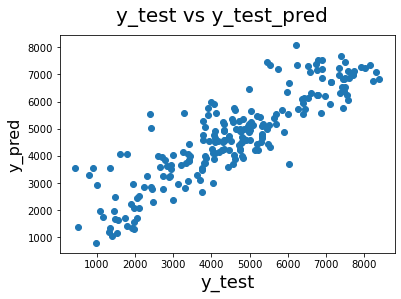

In [83]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [84]:
round(lr7.params,4)

const                  1085.4106
yr                     2072.8218
holiday                -737.5681
temp                   4777.8099
windspeed             -1578.9485
season_summer           766.0115
season_winter          1001.2371
mnth_sept               790.9441
weathersit_moderate    -565.8299
dtype: float64

We can see that the equation of our best fitted line is:

cnt = 1085.41 + 2072.82 * yr - 737.56 * holiday + 4777.80 * temp - 1578.94 * windspeed + 766.011 * season_summer + 1001.23 * season_winter + 790.944 * mnth_sept - 565.82 * weathersit_moderate

In [85]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7571


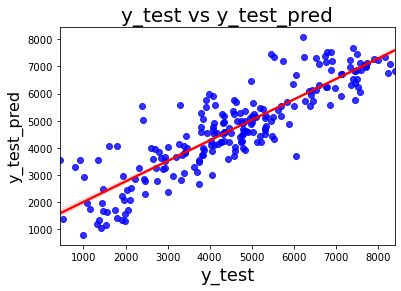

In [86]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()


### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.787
- Test dataset R^2           : 0.765
- Train dataset Adjusted R^2 : 0.784 
- Test dataset Adjusted R^2  : 0.757

### Final Insights:

All the positive coefficients like temp, season_Summer indicates that an increase in these values will lead to an increase in the value of cnt.

All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.

Temp is the most significant with the largest coefficient.

Bike rentals is more for the month of september.

The rentals reduce during holidays

##### This indicates that the bike rentals is majorly affected by temperature, season and month.